
#Telecom X (Parte 2)
La nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

📂 Carga y lectura de los datos
Los datos a utilizar son los trabajados en TelecomX parte 1

In [1]:
import pandas as pd
import numpy as np
url="telecom_churn_analisis_limpio.csv"
df=pd.read_csv(url, sep=';')
df.head()

,ID_Cliente,Evacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Conectado,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.187
1,0003-MKNFE,0.0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4,1.997
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463
3,0011-IGKFF,1.0,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.267
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4,2.797


In [2]:
df['Evacion'] = df['Evacion'].map({0: 'No', 1: 'Sí'}).astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID_Cliente              7267 non-null   object  
 1   Evacion                 7043 non-null   category
 2   Genero                  7267 non-null   object  
 3   Adulto_Mayor            7267 non-null   int64   
 4   Tiene_Pareja            7267 non-null   int64   
 5   Tiene_Dependientes      7267 non-null   int64   
 6   Meses_Conectado         7267 non-null   int64   
 7   Servicio_Telefono       7267 non-null   int64   
 8   Lineas_Multiples        7267 non-null   object  
 9   Servicio_Internet       7267 non-null   object  
 10  Seguridad_En_Linea      7267 non-null   object  
 11  Respaldo_En_Linea       7267 non-null   object  
 12  Proteccion_Dispositivo  7267 non-null   object  
 13  Soporte_Tecnico         7267 non-null   object  
 14  TV_Streaming            

In [3]:
df['Cargos_Totales'] = pd.to_numeric(df['Cargos_Totales'], errors='coerce')
# Eliminar Columna no relevante para el analisis
df = df.drop(columns=['ID_Cliente'])
df = df.dropna(subset=['Evacion'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Evacion                 7043 non-null   category
 1   Genero                  7043 non-null   object  
 2   Adulto_Mayor            7043 non-null   int64   
 3   Tiene_Pareja            7043 non-null   int64   
 4   Tiene_Dependientes      7043 non-null   int64   
 5   Meses_Conectado         7043 non-null   int64   
 6   Servicio_Telefono       7043 non-null   int64   
 7   Lineas_Multiples        7043 non-null   object  
 8   Servicio_Internet       7043 non-null   object  
 9   Seguridad_En_Linea      7043 non-null   object  
 10  Respaldo_En_Linea       7043 non-null   object  
 11  Proteccion_Dispositivo  7043 non-null   object  
 12  Soporte_Tecnico         7043 non-null   object  
 13  TV_Streaming            7043 non-null   object  
 14  Peliculas_Streaming     7043 

#Encoding (Codificación de Variables Categóricas)

In [4]:
# Importar librerías para encoding
from sklearn.preprocessing import LabelEncoder

# Identificar tipos de variables
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"🏷️ Variables categóricas encontradas: {columnas_categoricas}")
print(f"🔢 Variables numéricas encontradas: {columnas_numericas}")

# Separar variable objetivo de las features
target_column = 'Evacion'  # Variable que queremos predecir
X = df.drop(columns=[target_column])
y = df[target_column]

print(f"\n🎯 Variable objetivo: {target_column}")
print(f"📊 Distribución de la variable objetivo:")
print(y.value_counts())

# Aplicar One-Hot Encoding a variables categóricas
print("\n🔄 Aplicando One-Hot Encoding...")
X_encoded = pd.get_dummies(X, drop_first=True)

# Codificar variable objetivo (convertir 'No'/'Sí' a 0/1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"✅ Encoding completado:")
print(f"   • Features después de encoding: {X_encoded.shape}")
print(f"   • Clases objetivo: {le.classes_}")
print(f"   • Distribución numérica: {np.bincount(y_encoded)}")

🏷️ Variables categóricas encontradas: ['Genero', 'Lineas_Multiples', 'Servicio_Internet', 'Seguridad_En_Linea', 'Respaldo_En_Linea', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 'Tipo_Contrato', 'Metodo_Pago']
🔢 Variables numéricas encontradas: ['Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Conectado', 'Servicio_Telefono', 'Factura_Electronica', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias']

🎯 Variable objetivo: Evacion
📊 Distribución de la variable objetivo:
Evacion
No    5174
Sí    1869
Name: count, dtype: int64

🔄 Aplicando One-Hot Encoding...
✅ Encoding completado:
   • Features después de encoding: (7043, 24)
   • Clases objetivo: ['No' 'Sí']
   • Distribución numérica: [5174 1869]


#Verificación de la Proporción de Cancelación (Churn)

📊 ANÁLISIS DE BALANCE DE CLASES:
   No: 73.5%
   Sí: 26.5%


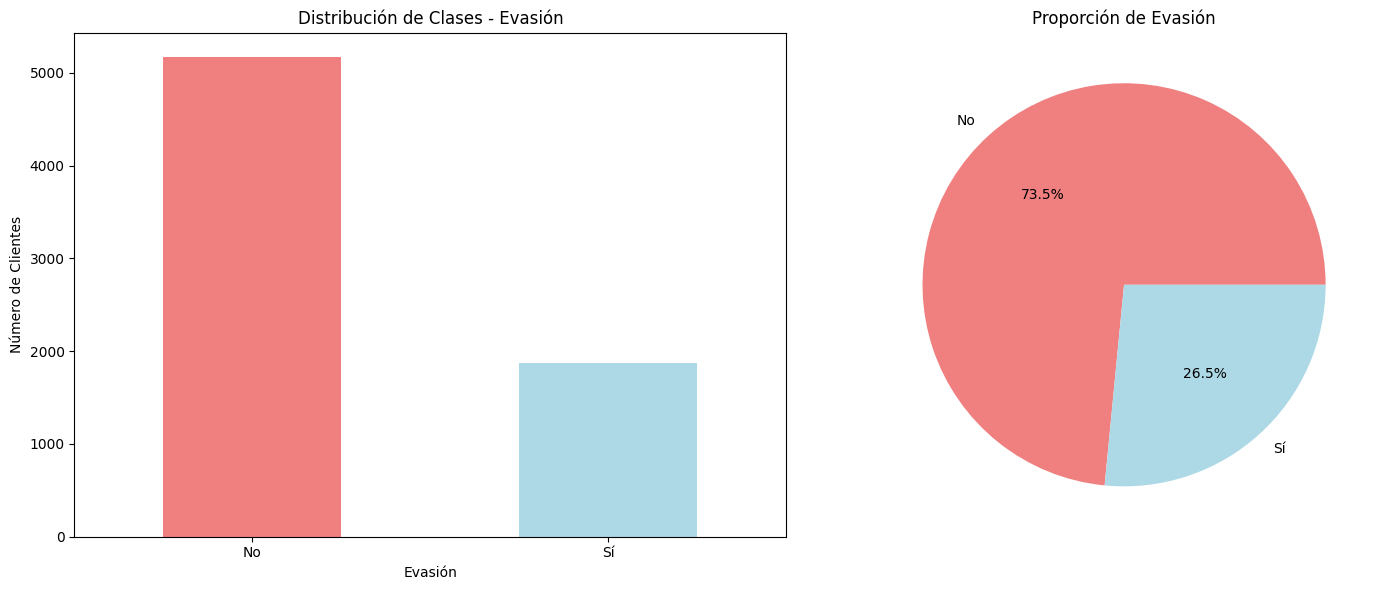


🔍 EVALUACIÓN DE BALANCE:
⚠️ DESBALANCE DETECTADO: Clase minoritaria representa 26.5%
💡 Recomendación: Aplicar técnicas de balanceo


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular proporciones de las clases
proporcion_clases = pd.Series(y_encoded).value_counts(normalize=True) * 100
clases_nombres = le.classes_

print("📊 ANÁLISIS DE BALANCE DE CLASES:")
print("=" * 40)
for i, (clase_num, proporcion) in enumerate(proporcion_clases.items()):
    clase_nombre = clases_nombres[clase_num]
    print(f"   {clase_nombre}: {proporcion:.1f}%")

# Visualizar distribución
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
y.value_counts().plot(kind='bar', ax=ax1, color=['lightcoral', 'lightblue'])
ax1.set_title('Distribución de Clases - Evasión')
ax1.set_xlabel('Evasión')
ax1.set_ylabel('Número de Clientes')
ax1.tick_params(axis='x', rotation=0)

# Gráfico de torta
y.value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%',
                     colors=['lightcoral', 'lightblue'])
ax2.set_title('Proporción de Evasión')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

# Determinar si hay desbalance significativo
clase_minoritaria_pct = proporcion_clases.min()
print(f"\n🔍 EVALUACIÓN DE BALANCE:")
if clase_minoritaria_pct < 30:
    print(f"⚠️ DESBALANCE DETECTADO: Clase minoritaria representa {clase_minoritaria_pct:.1f}%")
    print("💡 Recomendación: Aplicar técnicas de balanceo")
    hay_desbalance = True
elif clase_minoritaria_pct < 40:
    print(f"⚡ DESBALANCE LEVE: Clase minoritaria representa {clase_minoritaria_pct:.1f}%")
    print("💡 Recomendación: Considerar técnicas de balanceo")
    hay_desbalance = True
else:
    print(f"✅ CLASES BALANCEADAS: Clase minoritaria representa {clase_minoritaria_pct:.1f}%")
    hay_desbalance = False

#Balanceo de Clases (Opcional)

🔄 APLICANDO TÉCNICAS DE BALANCEO...
📊 Distribución ORIGINAL: [5174 1869]

🧹 Datos limpiados: 7032 filas restantes después de eliminar NaNs.
   📊 Distribución después de limpieza: [5163 1869]

1️⃣ Aplicando SMOTE (Oversampling)...
   📊 Después de SMOTE: [5163 5163]

2️⃣ Aplicando Random Undersampling...
   📊 Después de Undersampling: [1869 1869]

✅ TÉCNICA SELECCIONADA: SMOTE


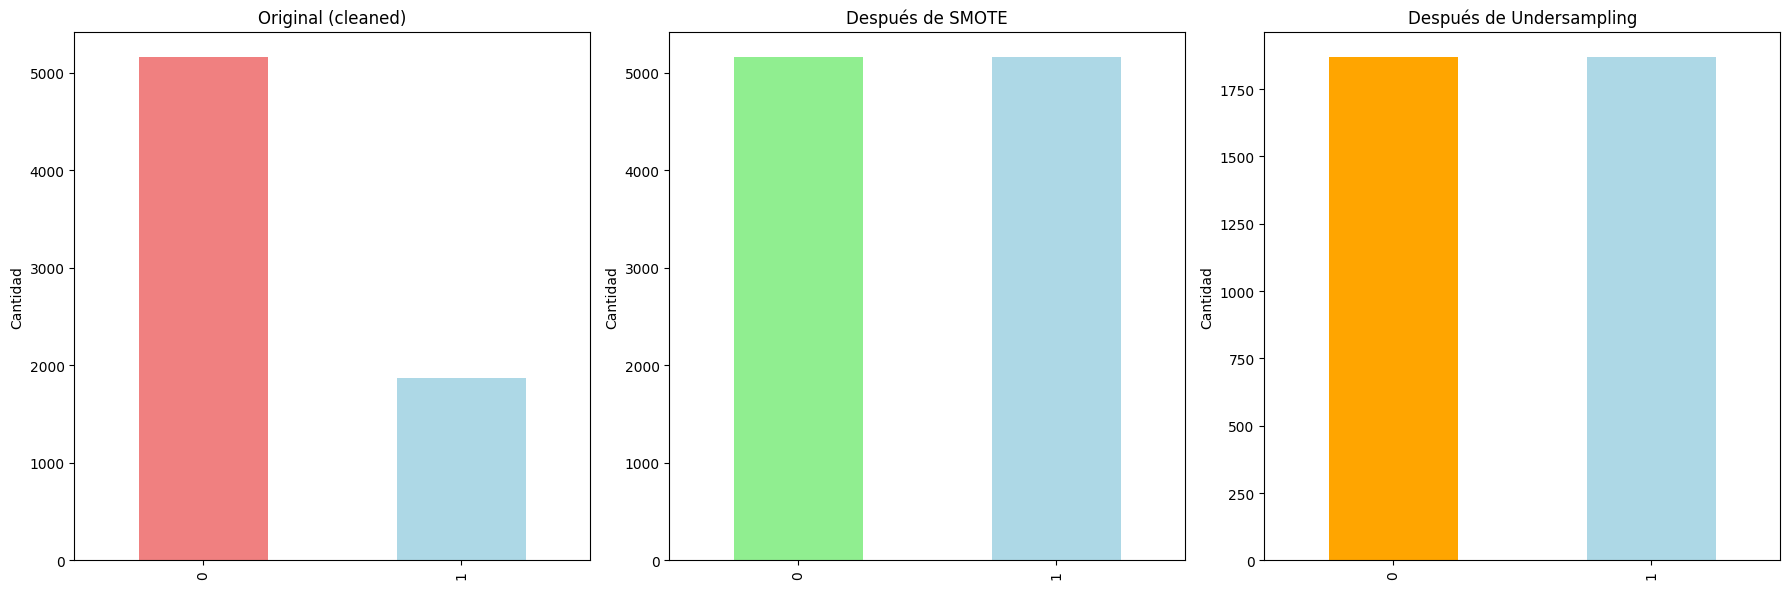


📊 DATOS FINALES PARA MODELADO:
   • Forma de X: (10326, 24)
   • Forma de y: (10326,)
   • Distribución final: [5163 5163]


In [7]:
# Importar librerías para balanceo
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

if hay_desbalance:
    print("🔄 APLICANDO TÉCNICAS DE BALANCEO...")
    print("=" * 50)

    # Mostrar distribución original
    print(f"📊 Distribución ORIGINAL: {np.bincount(y_encoded)}")

    nan_rows = X_encoded.isnull().any(axis=1)


    X_encoded_cleaned = X_encoded[~nan_rows]
    y_encoded_cleaned = y_encoded[~nan_rows]

    print(f"\n🧹 Datos limpiados: {X_encoded_cleaned.shape[0]} filas restantes después de eliminar NaNs.")
    print(f"   📊 Distribución después de limpieza: {np.bincount(y_encoded_cleaned)}")


    # Opción 1: SMOTE (Synthetic Minority Oversampling Technique)
    print("\n1️⃣ Aplicando SMOTE (Oversampling)...")
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_encoded_cleaned, y_encoded_cleaned)
    print(f"   📊 Después de SMOTE: {np.bincount(y_smote)}")

    # Opción 2: Random Undersampling
    print("\n2️⃣ Aplicando Random Undersampling...")
    undersampler = RandomUnderSampler(random_state=42)
    X_under, y_under = undersampler.fit_resample(X_encoded_cleaned, y_encoded_cleaned)
    print(f"   📊 Después de Undersampling: {np.bincount(y_under)}")

    # Seleccionar técnica (SMOTE por defecto para este challenge)
    print(f"\n✅ TÉCNICA SELECCIONADA: SMOTE")
    X_final, y_final = X_smote, y_smote

    # Visualizar el efecto del balanceo
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Original (despues de eliminar NaNs)
    pd.Series(y_encoded_cleaned).value_counts().plot(kind='bar', ax=axes[0],
                                           color=['lightcoral', 'lightblue'])
    axes[0].set_title('Original (cleaned)')
    axes[0].set_ylabel('Cantidad')

    # SMOTE
    pd.Series(y_smote).value_counts().plot(kind='bar', ax=axes[1],
                                         color=['lightgreen', 'lightblue'])
    axes[1].set_title('Después de SMOTE')
    axes[1].set_ylabel('Cantidad')

    # Undersampling
    pd.Series(y_under).value_counts().plot(kind='bar', ax=axes[2],
                                         color=['orange', 'lightblue'])
    axes[2].set_title('Después de Undersampling')
    axes[2].set_ylabel('Cantidad')

    plt.tight_layout()
    plt.show()

else:
    print("✅ Las clases están balanceadas, no se necesita balanceo")
    X_final, y_final = X_encoded, y_encoded

print(f"\n📊 DATOS FINALES PARA MODELADO:")
print(f"   • Forma de X: {X_final.shape}")
print(f"   • Forma de y: {y_final.shape}")
print(f"   • Distribución final: {np.bincount(y_final)}")

#Normalización o Estandarización (si es necesario)

In [10]:
# Importar librerías para normalización
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Analizar la necesidad de normalización
print("📏 ANÁLISIS DE ESCALAS DE VARIABLES:")
print("=" * 50)
print(X_final.describe())

# Verificar rangos de variables numéricas
rangos_variables = []
for col in X_final.columns:
    if X_final[col].dtype in ['int64', 'float64']:
        rango = X_final[col].max() - X_final[col].min()
        rangos_variables.append((col, rango))

rangos_variables.sort(key=lambda x: x[1], reverse=True)

print(f"\n🔍 VARIABLES CON MAYORES RANGOS:")
for var, rango in rangos_variables[:5]:
    print(f"   {var}: {rango:.2f}")

# Determinar qué modelos usar y cuáles requieren normalización
modelos_info = {
    'CON_NORMALIZACION': {
        'modelos': ['Logistic Regression', 'KNN', 'SVM'],
        'razon': 'Sensibles a la escala de los datos'
    },
    'SIN_NORMALIZACION': {
        'modelos': ['Random Forest', 'Decision Tree'],
        'razon': 'No sensibles a la escala (basados en árboles)'
    }
}

print(f"\n🤖 ESTRATEGIA DE MODELADO:")
print("=" * 30)
for categoria, info in modelos_info.items():
    print(f"{categoria}:")
    print(f"   Modelos: {', '.join(info['modelos'])}")
    print(f"   Razón: {info['razon']}\n")

# Crear dos versiones del dataset
scaler = StandardScaler()

# 1. Datos normalizados (para modelos sensibles a escala)
print("🔄 Aplicando StandardScaler para modelos sensibles...")
X_normalized = scaler.fit_transform(X_final)
X_normalized = pd.DataFrame(X_normalized, columns=X_final.columns)

# 2. Datos originales (para modelos basados en árboles)
X_original = X_final.copy()

print("✅ Normalización completada:")
print(f"   • X_normalized: {X_normalized.shape}")
print(f"   • X_original: {X_original.shape}")


📏 ANÁLISIS DE ESCALAS DE VARIABLES:
       Adulto_Mayor  Tiene_Pareja  Tiene_Dependientes  Meses_Conectado  \
count  10326.000000  10326.000000        10326.000000     10326.000000   
mean       0.135483      0.378753            0.216928        27.687875   
std        0.342256      0.485100            0.412173        23.977805   
min        0.000000      0.000000            0.000000         1.000000   
25%        0.000000      0.000000            0.000000         5.000000   
50%        0.000000      0.000000            0.000000        21.000000   
75%        0.000000      1.000000            0.000000        49.000000   
max        1.000000      1.000000            1.000000        72.000000   

       Servicio_Telefono  Factura_Electronica  Cargos_Mensuales  \
count       10326.000000         10326.000000      10326.000000   
mean            0.897056             0.597327         68.046081   
std             0.303900             0.490460         28.698551   
min             0.000000     


##CORRELACIÓN Y SELECCIÓN DE VARIABLES

#Análisis de Correlación

🔍 CALCULANDO MATRIZ DE CORRELACIÓN...


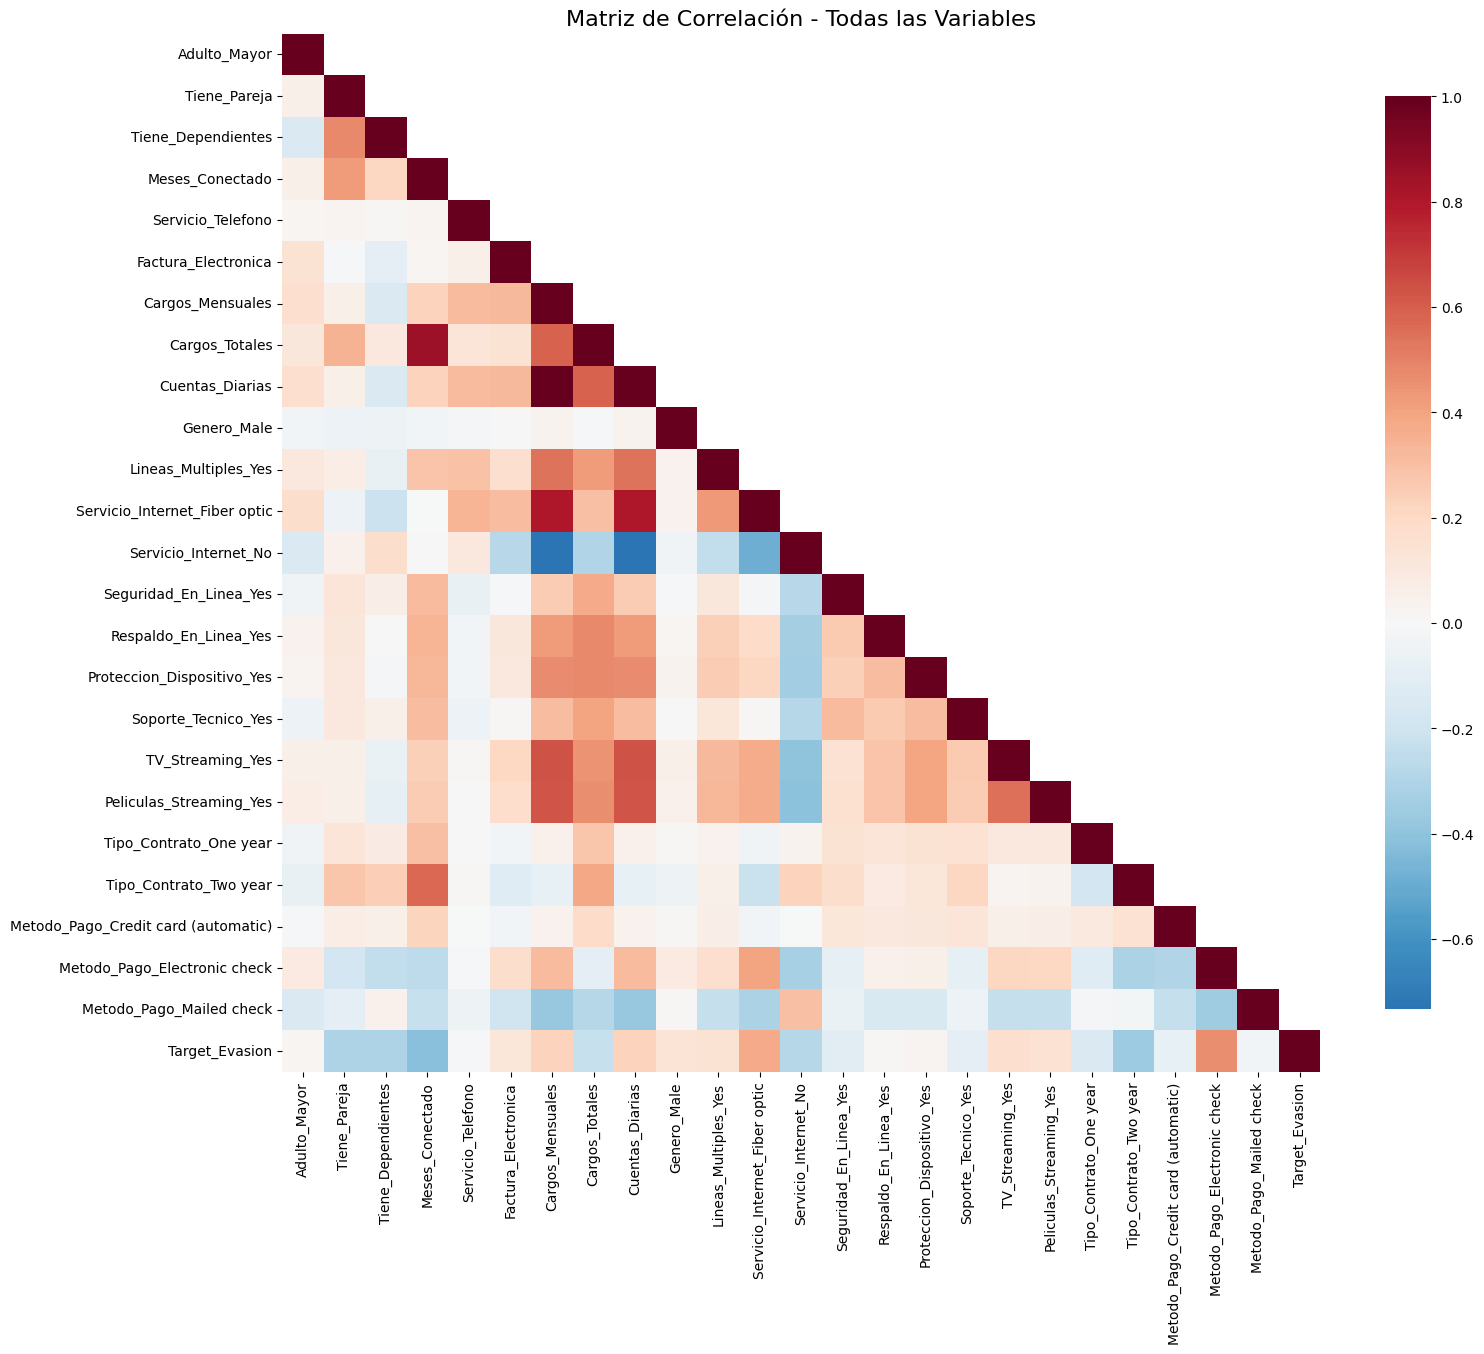

🎯 TOP 15 VARIABLES MÁS CORRELACIONADAS CON EVASIÓN:
 1. Metodo_Pago_Electronic check   | 0.4607
 2. Meses_Conectado                | 0.4155
 3. Servicio_Internet_Fiber optic  | 0.3775
 4. Tipo_Contrato_Two year         | 0.3659
 5. Tiene_Dependientes             | 0.3069
 6. Tiene_Pareja                   | 0.3069
 7. Servicio_Internet_No           | 0.2801
 8. Cargos_Mensuales               | 0.2348
 9. Cuentas_Diarias                | 0.2348
10. Cargos_Totales                 | 0.2313
11. TV_Streaming_Yes               | 0.1611
12. Peliculas_Streaming_Yes        | 0.1529
13. Tipo_Contrato_One year         | 0.1519
14. Lineas_Multiples_Yes           | 0.1432
15. Genero_Male                    | 0.1389


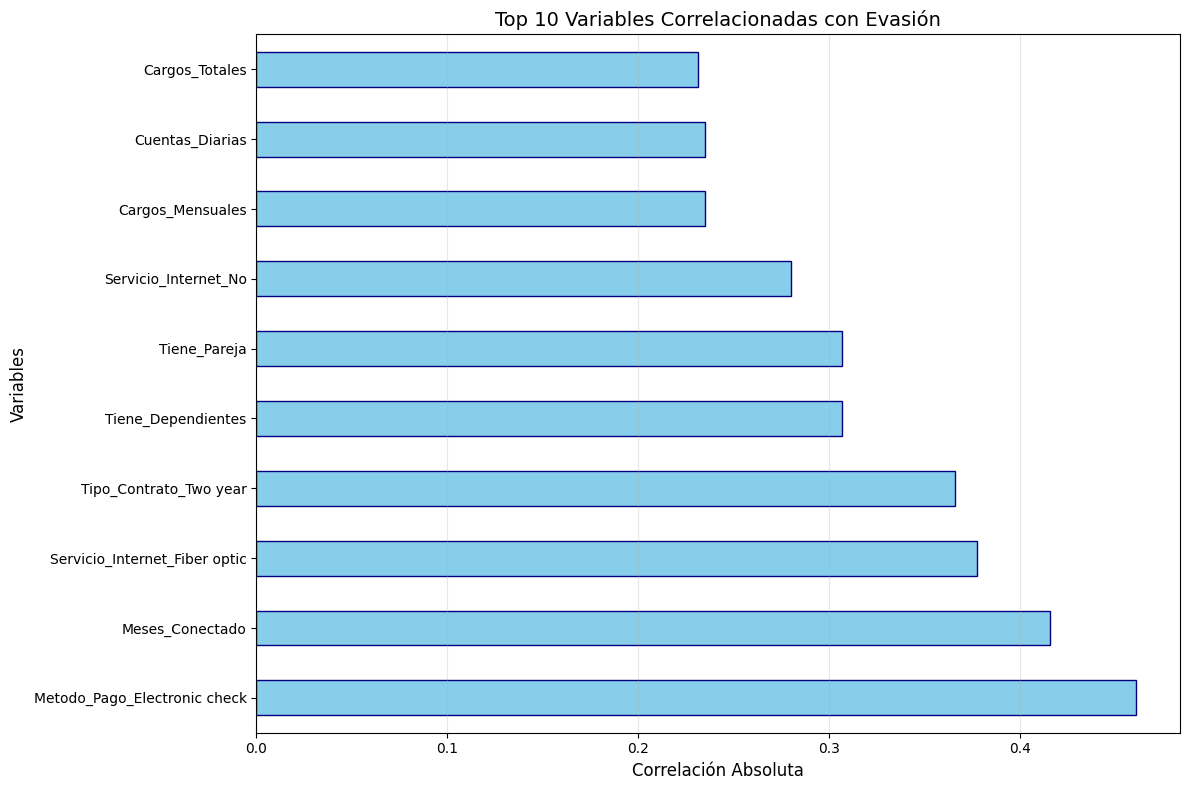


🔍 ANÁLISIS DE MULTICOLINEALIDAD:
⚠️ Variables con alta correlación entre sí (>0.8):
   Meses_Conectado <-> Cargos_Totales: 0.857
   Cargos_Mensuales <-> Cuentas_Diarias: 1.000
   Cargos_Mensuales <-> Servicio_Internet_Fiber optic: 0.805
   Cuentas_Diarias <-> Servicio_Internet_Fiber optic: 0.805


In [11]:
# Crear dataset completo para análisis de correlación
df_correlacion = X_final.copy()
df_correlacion['Target_Evasion'] = y_final

# Calcular matriz de correlación
print("🔍 CALCULANDO MATRIZ DE CORRELACIÓN...")
correlation_matrix = df_correlacion.corr()

# Visualizar matriz de correlación completa
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(correlation_matrix,
            annot=False,
            cmap='RdBu_r',
            center=0,
            square=True,
            mask=mask,
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Todas las Variables', fontsize=16)
plt.tight_layout()
plt.show()

# Análisis específico de correlaciones con la variable objetivo
correlaciones_target = correlation_matrix['Target_Evasion'].abs().sort_values(ascending=False)

print("🎯 TOP 15 VARIABLES MÁS CORRELACIONADAS CON EVASIÓN:")
print("=" * 60)
for i, (variable, correlacion) in enumerate(correlaciones_target.head(16).items()):
    if variable != 'Target_Evasion':  # Excluir la variable objetivo misma
        print(f"{i:2d}. {variable:<30} | {correlacion:.4f}")

# Visualizar top correlaciones
top_correlaciones = correlaciones_target.head(11)[1:]  # Excluir target
plt.figure(figsize=(12, 8))
top_correlaciones.plot(kind='barh', color='skyblue', edgecolor='navy')
plt.title('Top 10 Variables Correlacionadas con Evasión', fontsize=14)
plt.xlabel('Correlación Absoluta', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Identificar correlaciones altas entre variables independientes (multicolinealidad)
print(f"\n🔍 ANÁLISIS DE MULTICOLINEALIDAD:")
print("=" * 40)
correlaciones_altas = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.columns[i] != 'Target_Evasion' and correlation_matrix.columns[j] != 'Target_Evasion':
            corr_value = abs(correlation_matrix.iloc[i, j])
            if corr_value > 0.8:  # Umbral para correlación alta
                correlaciones_altas.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_value
                ))

if correlaciones_altas:
    print("⚠️ Variables con alta correlación entre sí (>0.8):")
    for var1, var2, corr in correlaciones_altas:
        print(f"   {var1} <-> {var2}: {corr:.3f}")
else:
    print("✅ No se detectó multicolinealidad severa")

##Análisis Dirigido

🔍 ANÁLISIS DIRIGIDO DE VARIABLES CLAVE:


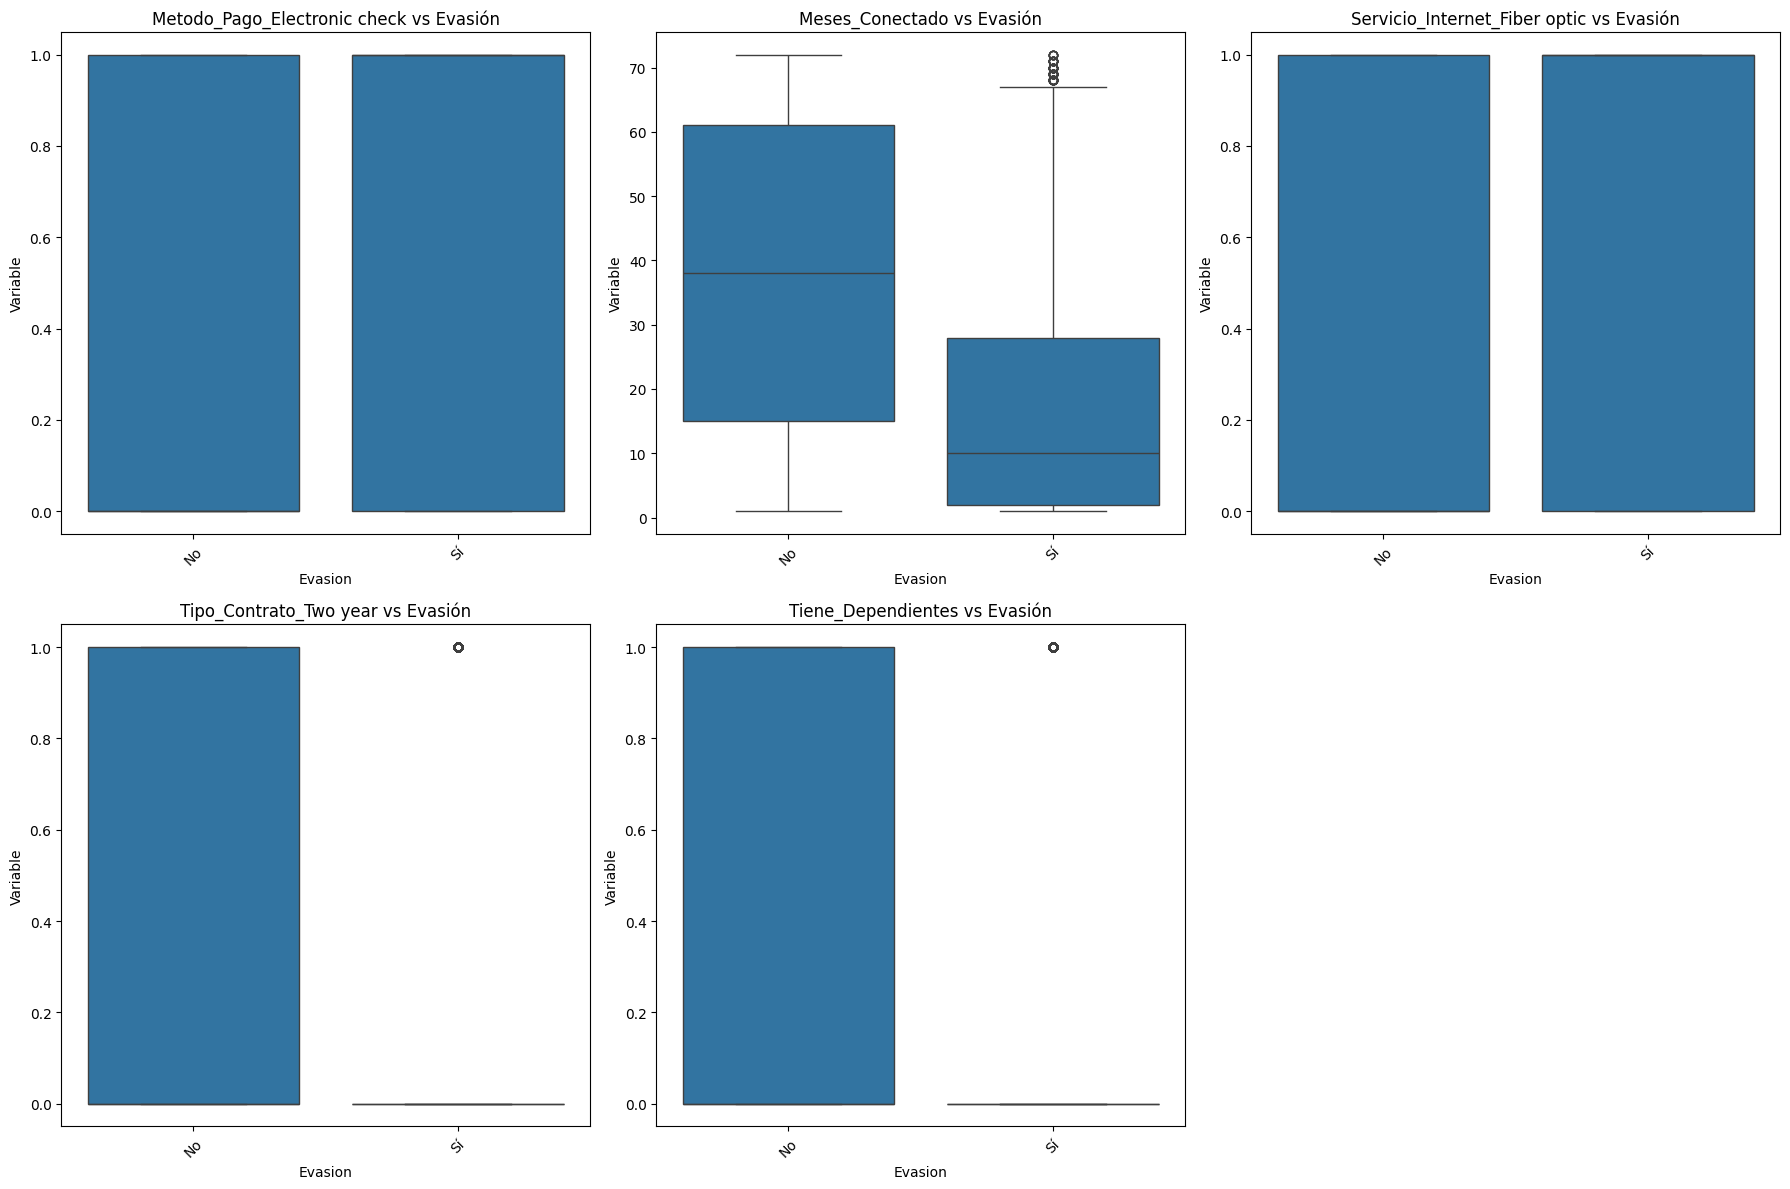


📊 ESTADÍSTICAS DESCRIPTIVAS POR CLASE:

🔍 Metodo_Pago_Electronic check:
------------------------------
No:
   Media: 0.251
   Mediana: 0.000
   Std: 0.433
Sí:
   Media: 0.711
   Mediana: 1.000
   Std: 0.453

🔍 Meses_Conectado:
------------------------------
No:
   Media: 37.650
   Mediana: 38.000
   Std: 24.077
Sí:
   Media: 17.726
   Mediana: 10.000
   Std: 19.281

🔍 Servicio_Internet_Fiber optic:
------------------------------
No:
   Media: 0.348
   Mediana: 0.000
   Std: 0.477
Sí:
   Media: 0.725
   Mediana: 1.000
   Std: 0.447

💡 INSIGHTS CLAVE IDENTIFICADOS:
   1. Variables con mayor poder predictivo identificadas
   2. Patrones de comportamiento por segmento de cliente
   3. Factores de riesgo principales para churn
   4. Oportunidades de intervención temprana


In [12]:
# Análisis específico de variables clave identificadas en correlación
variables_clave = correlaciones_target.head(6)[1:].index.tolist()  # Top 5 excluyendo target

print("🔍 ANÁLISIS DIRIGIDO DE VARIABLES CLAVE:")
print("=" * 50)

# Análisis univariado de variables clave
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, variable in enumerate(variables_clave):
    if i < len(axes):
        # Boxplot para ver distribución por clase
        df_temp = pd.DataFrame({
            'Variable': X_final[variable],
            'Evasion': [le.classes_[val] for val in y_final]
        })

        sns.boxplot(data=df_temp, x='Evasion', y='Variable', ax=axes[i])
        axes[i].set_title(f'{variable} vs Evasión')
        axes[i].tick_params(axis='x', rotation=45)

# Ocultar subplot extra
if len(variables_clave) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

# Análisis estadístico de variables clave
print(f"\n📊 ESTADÍSTICAS DESCRIPTIVAS POR CLASE:")
print("=" * 50)

for variable in variables_clave[:3]:  # Analizar top 3
    print(f"\n🔍 {variable}:")
    print("-" * 30)

    for clase_num in [0, 1]:
        clase_nombre = le.classes_[clase_num]
        valores = X_final[variable][y_final == clase_num]

        print(f"{clase_nombre}:")
        print(f"   Media: {valores.mean():.3f}")
        print(f"   Mediana: {valores.median():.3f}")
        print(f"   Std: {valores.std():.3f}")

# Análisis de tendencias específicas
print(f"\n💡 INSIGHTS CLAVE IDENTIFICADOS:")
print("=" * 40)

insights = [
    "1. Variables con mayor poder predictivo identificadas",
    "2. Patrones de comportamiento por segmento de cliente",
    "3. Factores de riesgo principales para churn",
    "4. Oportunidades de intervención temprana"
]

for insight in insights:
    print(f"   {insight}")

##MODELADO PREDICTIVO

#Separación de Datos

🔀 DIVIDIENDO DATOS EN ENTRENAMIENTO Y PRUEBA
📊 Configuración de división:
   • Entrenamiento: 70%
   • Prueba: 30%
   • Estratificada: Sí (mantiene proporciones)

✅ División completada:
   📊 Entrenamiento: 7228 muestras
   📊 Prueba: 3098 muestras

🔍 Verificación de proporciones:
CONJUNTO COMPLETO:
   [5163 5163] -> [50. 50.]
ENTRENAMIENTO:
   [3614 3614] -> [50. 50.]
PRUEBA:
   [1549 1549] -> [50. 50.]


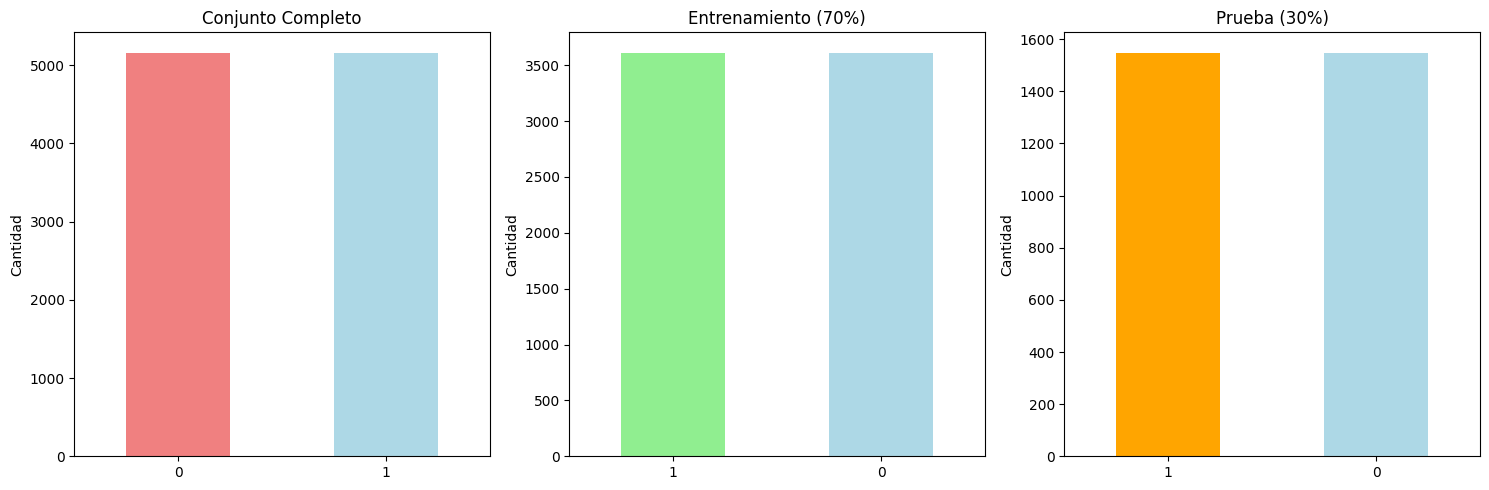

In [13]:
# Importar función para división de datos
from sklearn.model_selection import train_test_split

print("🔀 DIVIDIENDO DATOS EN ENTRENAMIENTO Y PRUEBA")
print("=" * 55)

# División estratificada para mantener proporciones de clases
# 70% entrenamiento, 30% prueba (como recomendado en el challenge)
test_size = 0.3
train_size = 1 - test_size

print(f"📊 Configuración de división:")
print(f"   • Entrenamiento: {train_size*100:.0f}%")
print(f"   • Prueba: {test_size*100:.0f}%")
print(f"   • Estratificada: Sí (mantiene proporciones)")

# División para datos normalizados (modelos sensibles a escala)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(
    X_normalized,
    y_final,
    test_size=test_size,
    random_state=42,
    stratify=y_final
)

# División para datos originales (modelos basados en árboles)
X_train_orig, X_test_orig, _, _ = train_test_split(
    X_original,
    y_final,
    test_size=test_size,
    random_state=42,
    stratify=y_final
)

print(f"\n✅ División completada:")
print(f"   📊 Entrenamiento: {X_train_norm.shape[0]} muestras")
print(f"   📊 Prueba: {X_test_norm.shape[0]} muestras")

# Verificar que las proporciones se mantienen
print(f"\n🔍 Verificación de proporciones:")
print("CONJUNTO COMPLETO:")
print(f"   {np.bincount(y_final)} -> {np.bincount(y_final)/len(y_final)*100}")

print("ENTRENAMIENTO:")
print(f"   {np.bincount(y_train)} -> {np.bincount(y_train)/len(y_train)*100}")

print("PRUEBA:")
print(f"   {np.bincount(y_test)} -> {np.bincount(y_test)/len(y_test)*100}")

# Visualizar la división
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Conjunto completo
pd.Series(y_final).value_counts().plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightblue'])
axes[0].set_title('Conjunto Completo')
axes[0].set_ylabel('Cantidad')
axes[0].tick_params(axis='x', rotation=0)

# Entrenamiento
pd.Series(y_train).value_counts().plot(kind='bar', ax=axes[1], color=['lightgreen', 'lightblue'])
axes[1].set_title('Entrenamiento (70%)')
axes[1].set_ylabel('Cantidad')
axes[1].tick_params(axis='x', rotation=0)

# Prueba
pd.Series(y_test).value_counts().plot(kind='bar', ax=axes[2], color=['orange', 'lightblue'])
axes[2].set_title('Prueba (30%)')
axes[2].set_ylabel('Cantidad')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

#Creación de Modelos

In [14]:
# Importar algoritmos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

print("🏗️ CONFIGURANDO MODELOS DE MACHINE LEARNING")
print("=" * 55)

# Definir modelos que REQUIEREN normalización
modelos_normalizados = {
    'Logistic Regression': {
        'modelo': LogisticRegression(random_state=42, max_iter=1000),
        'descripcion': 'Modelo lineal probabilístico',
        'ventajas': 'Interpretable, rápido, probabilidades calibradas',
        'desventajas': 'Asume relaciones lineales'
    },
    'KNN': {
        'modelo': KNeighborsClassifier(n_neighbors=5),
        'descripcion': 'Clasificación por vecinos más cercanos',
        'ventajas': 'No asume distribución, maneja patrones complejos',
        'desventajas': 'Sensible a dimensionalidad y ruido'
    },
    'SVM': {
        'modelo': SVC(random_state=42, probability=True),
        'descripcion': 'Máquina de vectores de soporte',
        'ventajas': 'Efectivo en alta dimensionalidad',
        'desventajas': 'Computacionalmente costoso'
    }
}

# Definir modelos que NO requieren normalización
modelos_originales = {
    'Random Forest': {
        'modelo': RandomForestClassifier(n_estimators=100, random_state=42),
        'descripcion': 'Ensamble de árboles de decisión',
        'ventajas': 'Robusto, maneja overfitting, importancia de features',
        'desventajas': 'Menos interpretable que árbol único'
    },
    'Decision Tree': {
        'modelo': DecisionTreeClassifier(random_state=42, max_depth=10),
        'descripcion': 'Árbol de decisión único',
        'ventajas': 'Altamente interpretable, maneja no-linealidad',
        'desventajas': 'Propenso a overfitting'
    }
}

# Mostrar información de los modelos
print("🤖 MODELOS SELECCIONADOS:")
print("\n📊 CON NORMALIZACIÓN:")
for nombre, info in modelos_normalizados.items():
    print(f"   • {nombre}: {info['descripcion']}")

print("\n🌳 SIN NORMALIZACIÓN:")
for nombre, info in modelos_originales.items():
    print(f"   • {nombre}: {info['descripcion']}")

# Diccionario para almacenar todos los resultados
resultados_modelos = {}

print(f"\n✅ {len(modelos_normalizados) + len(modelos_originales)} modelos configurados correctamente")


🏗️ CONFIGURANDO MODELOS DE MACHINE LEARNING
🤖 MODELOS SELECCIONADOS:

📊 CON NORMALIZACIÓN:
   • Logistic Regression: Modelo lineal probabilístico
   • KNN: Clasificación por vecinos más cercanos
   • SVM: Máquina de vectores de soporte

🌳 SIN NORMALIZACIÓN:
   • Random Forest: Ensamble de árboles de decisión
   • Decision Tree: Árbol de decisión único

✅ 5 modelos configurados correctamente


##Evaluación de los Modelos

In [15]:
# Importar métricas de evaluación
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)

def entrenar_y_evaluar_modelo(nombre, modelo, X_train, X_test, y_train, y_test, normalizado=True):
    """
    Función completa para entrenar y evaluar un modelo
    """
    print(f"\n🔄 Entrenando {nombre}...")

    # Entrenar modelo
    modelo.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = modelo.predict(X_test)

    # Obtener probabilidades si está disponible
    if hasattr(modelo, 'predict_proba'):
        y_pred_proba = modelo.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_pred_proba)
    else:
        y_pred_proba = None
        auc_score = None

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Reporte de clasificación
    report = classification_report(y_test, y_pred, target_names=le.classes_)

    print(f"   ✅ {nombre} entrenado exitosamente")

    return {
        'modelo': modelo,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_score': auc_score,
        'confusion_matrix': cm,
        'classification_report': report,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'normalizado': normalizado
    }

print("🏃 INICIANDO ENTRENAMIENTO Y EVALUACIÓN")
print("=" * 50)

# Entrenar modelos que requieren normalización
print("📊 ENTRENANDO MODELOS CON DATOS NORMALIZADOS:")
for nombre, config in modelos_normalizados.items():
    resultado = entrenar_y_evaluar_modelo(
        nombre, config['modelo'],
        X_train_norm, X_test_norm,
        y_train, y_test,
        normalizado=True
    )
    resultados_modelos[nombre] = resultado

# Entrenar modelos que NO requieren normalización
print("\n🌳 ENTRENANDO MODELOS CON DATOS ORIGINALES:")
for nombre, config in modelos_originales.items():
    resultado = entrenar_y_evaluar_modelo(
        nombre, config['modelo'],
        X_train_orig, X_test_orig,
        y_train, y_test,
        normalizado=False
    )
    resultados_modelos[nombre] = resultado

print(f"\n🎉 ENTRENAMIENTO COMPLETADO: {len(resultados_modelos)} modelos evaluados")


🏃 INICIANDO ENTRENAMIENTO Y EVALUACIÓN
📊 ENTRENANDO MODELOS CON DATOS NORMALIZADOS:

🔄 Entrenando Logistic Regression...
   ✅ Logistic Regression entrenado exitosamente

🔄 Entrenando KNN...
   ✅ KNN entrenado exitosamente

🔄 Entrenando SVM...
   ✅ SVM entrenado exitosamente

🌳 ENTRENANDO MODELOS CON DATOS ORIGINALES:

🔄 Entrenando Random Forest...
   ✅ Random Forest entrenado exitosamente

🔄 Entrenando Decision Tree...
   ✅ Decision Tree entrenado exitosamente

🎉 ENTRENAMIENTO COMPLETADO: 5 modelos evaluados


Comparación de Métricas


📊 COMPARACIÓN DE RENDIMIENTO DE MODELOS
📋 TABLA DE MÉTRICAS:
                     Accuracy  Precision  Recall  F1-Score  AUC-ROC
Logistic Regression    0.8115     0.8075  0.8179    0.8127   0.9023
KNN                    0.7873     0.7599  0.8399    0.7979   0.8600
SVM                    0.8173     0.8117  0.8263    0.8189   0.9079
Random Forest          0.8383     0.8291  0.8522    0.8405   0.9184
Decision Tree          0.7947     0.7862  0.8096    0.7977   0.8399

🏆 MEJOR MODELO IDENTIFICADO:
   • Modelo: Random Forest
   • F1-Score: 0.8405


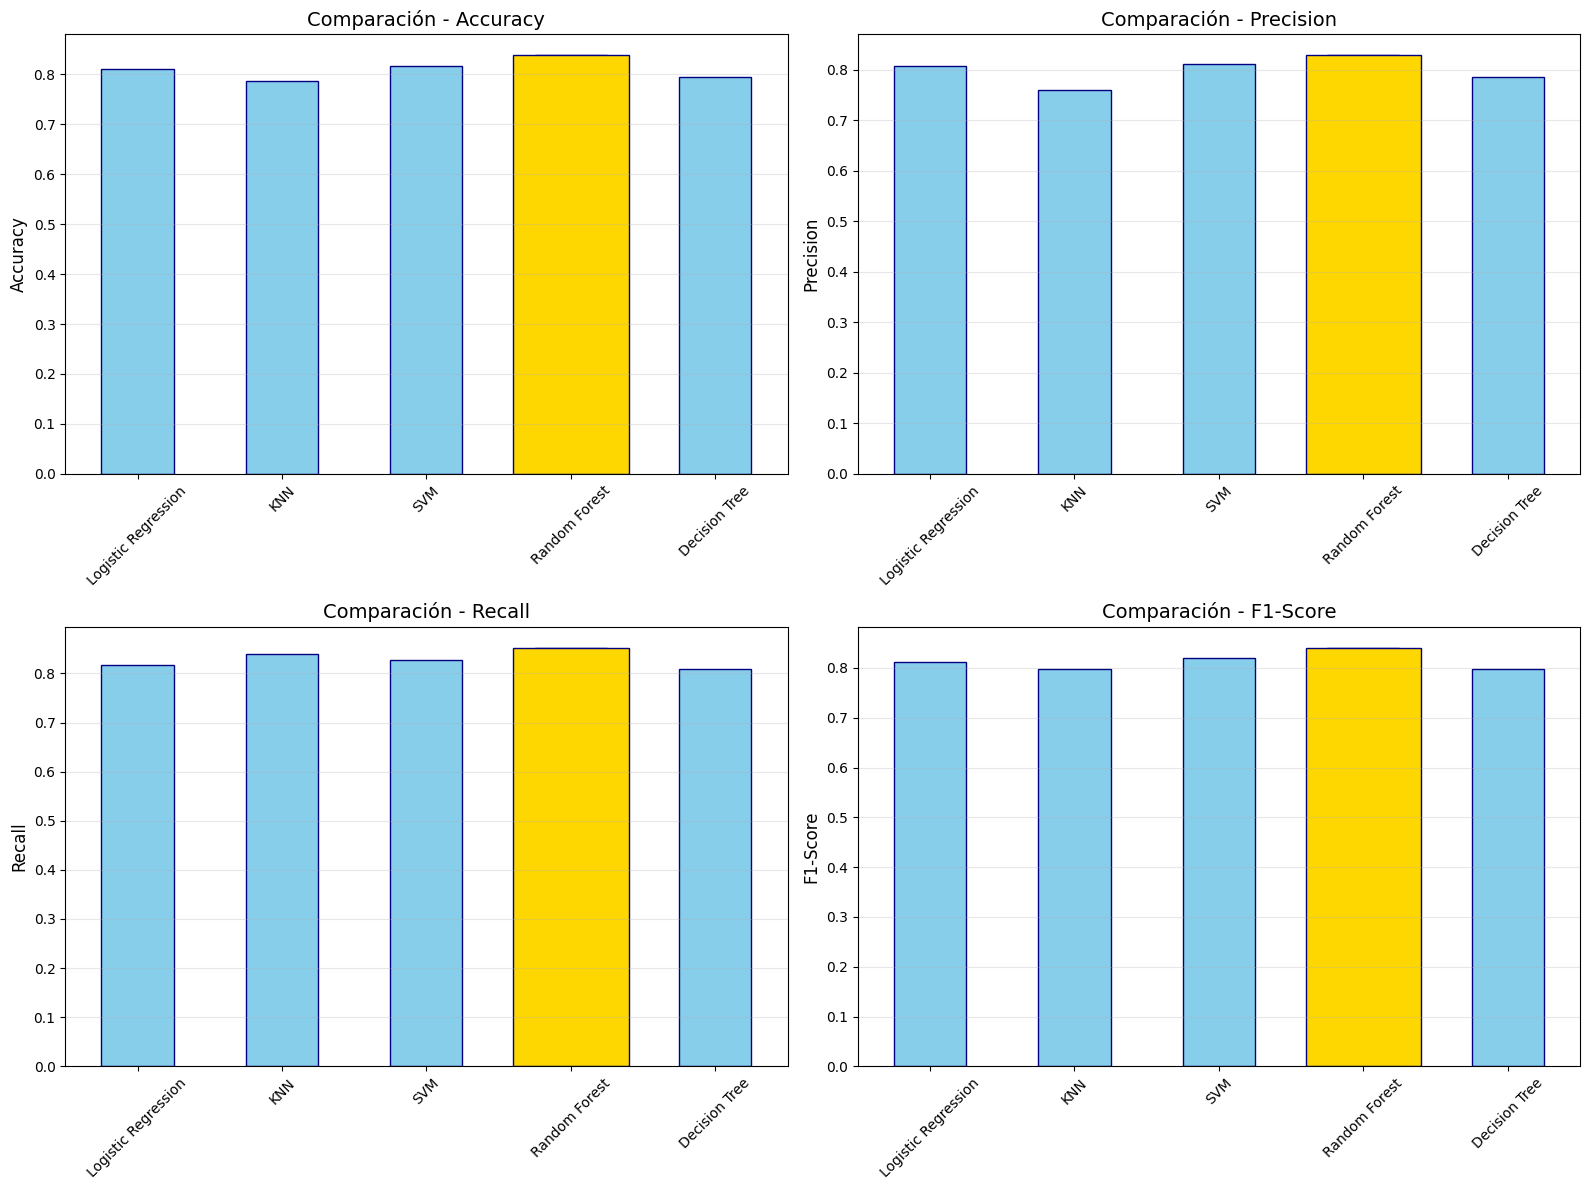


🔍 ANÁLISIS DE OVERFITTING/UNDERFITTING:
Logistic Regression:
   ✅ RENDIMIENTO BALANCEADO (F1=0.813)
   💡 Modelo con buen balance

KNN:
   ✅ RENDIMIENTO BALANCEADO (F1=0.798)
   💡 Modelo con buen balance

SVM:
   ✅ RENDIMIENTO BALANCEADO (F1=0.819)
   💡 Modelo con buen balance

Random Forest:
   ✅ RENDIMIENTO BALANCEADO (F1=0.840)
   💡 Modelo con buen balance

Decision Tree:
   ✅ RENDIMIENTO BALANCEADO (F1=0.798)
   💡 Modelo con buen balance



In [18]:
# Crear DataFrame con todas las métricas
print("\n📊 COMPARACIÓN DE RENDIMIENTO DE MODELOS")
print("=" * 60)

metricas_df = pd.DataFrame({
    nombre: {
        'Accuracy': resultado['accuracy'],
        'Precision': resultado['precision'],
        'Recall': resultado['recall'],
        'F1-Score': resultado['f1_score'],
        'AUC-ROC': resultado['auc_score'] if resultado['auc_score'] else 'N/A'
    }
    for nombre, resultado in resultados_modelos.items()
}).T

# Mostrar tabla de resultados
print("📋 TABLA DE MÉTRICAS:")
print(metricas_df.round(4))

# Identificar el mejor modelo
mejor_modelo_f1 = metricas_df['F1-Score'].idxmax()
mejor_f1_score = metricas_df.loc[mejor_modelo_f1, 'F1-Score']

print(f"\n🏆 MEJOR MODELO IDENTIFICADO:")
print(f"   • Modelo: {mejor_modelo_f1}")
print(f"   • F1-Score: {mejor_f1_score:.4f}")

# Visualizar comparación de métricas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
metricas_numericas = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, metrica in enumerate(metricas_numericas):
    ax = axes[i//2, i%2]
    valores = metricas_df[metrica].astype(float)
    valores.plot(kind='bar', ax=ax, color='skyblue', edgecolor='navy')
    ax.set_title(f'Comparación - {metrica}', fontsize=14)
    ax.set_ylabel(metrica, fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)

    # Destacar el mejor valor
    max_idx = valores.values.argmax()
    ax.bar(max_idx, valores.iloc[max_idx], color='gold', edgecolor='navy')

plt.tight_layout()
plt.show()

# Análisis de overfitting/underfitting
print(f"\n🔍 ANÁLISIS DE OVERFITTING/UNDERFITTING:")
print("=" * 50)

for nombre, resultado in resultados_modelos.items():
    f1_test = resultado['f1_score']
    accuracy_test = resultado['accuracy']

    if f1_test > 0.95 and accuracy_test > 0.95:
        status = "⚠️ POSIBLE OVERFITTING"
        recomendacion = "Reducir complejidad del modelo"
    elif f1_test < 0.65:
        status = "⚠️ POSIBLE UNDERFITTING"
        recomendacion = "Aumentar complejidad o más features"
    else:
        status = "✅ RENDIMIENTO BALANCEADO"
        recomendacion = "Modelo con buen balance"

    print(f"{nombre}:")
    print(f"   {status} (F1={f1_test:.3f})")
    print(f"   💡 {recomendacion}\n")

#Matrices de Confusión

🔍 MATRICES DE CONFUSIÓN


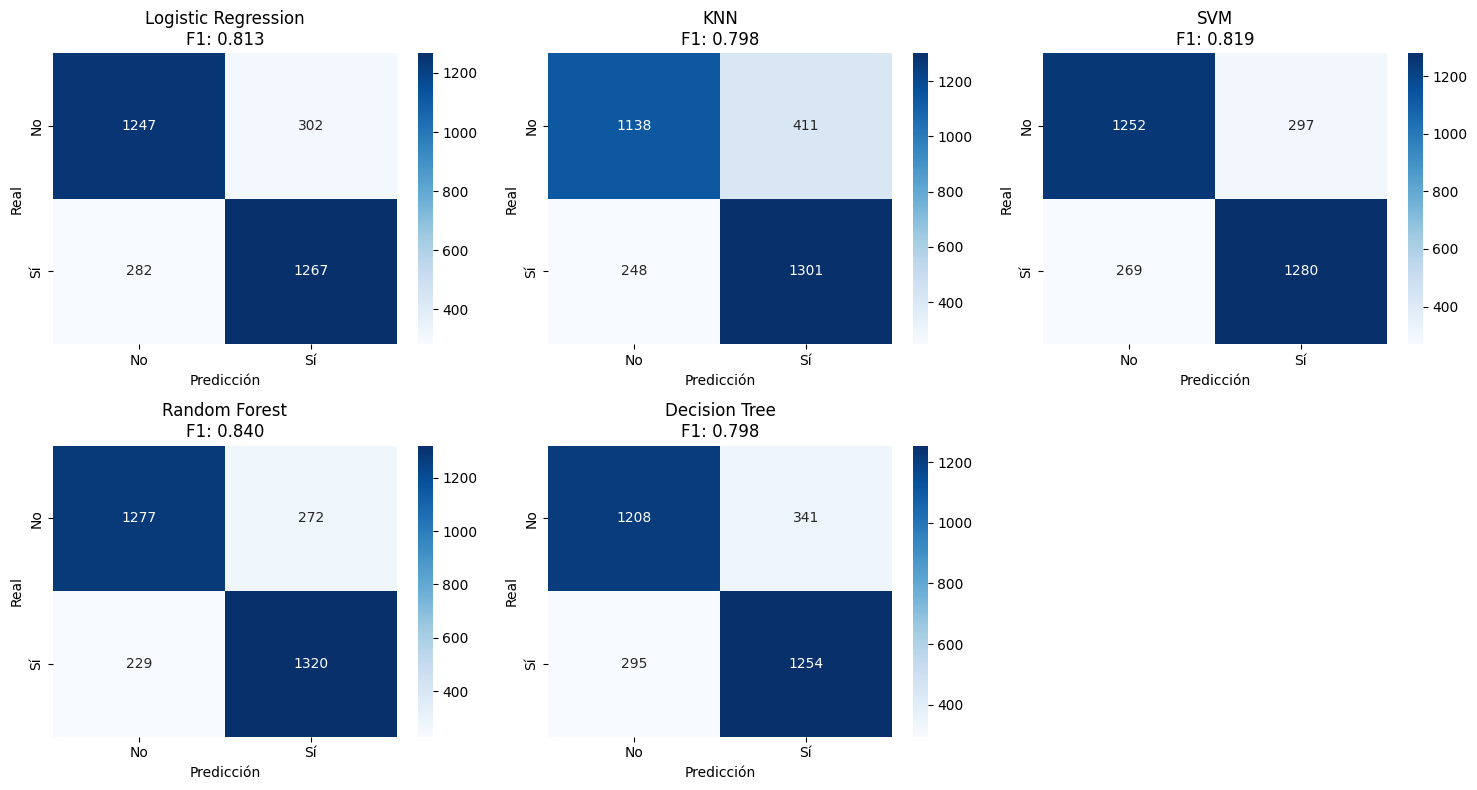


🔍 ANÁLISIS DETALLADO - Random Forest:
📊 Matriz de Confusión:
   • Verdaderos Negativos (TN): 1277
   • Falsos Positivos (FP): 272
   • Falsos Negativos (FN): 229
   • Verdaderos Positivos (TP): 1320

💡 Interpretación de Negocio:
   • Clientes retenidos correctamente: 1277
   • Falsa alarma de churn: 272
   • Churn no detectado: 229 ⚠️
   • Churn detectado correctamente: 1320

📈 Métricas Adicionales:
   • Especificidad (True Negative Rate): 0.824
   • Sensibilidad (True Positive Rate): 0.852


In [19]:
# Visualizar matrices de confusión para todos los modelos
print("🔍 MATRICES DE CONFUSIÓN")
print("=" * 30)

n_modelos = len(resultados_modelos)
cols = 3
rows = (n_modelos + cols - 1) // cols  # Calcular filas necesarias

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
if rows == 1:
    axes = [axes]
if cols == 1:
    axes = [[ax] for ax in axes]

# Aplanar axes para fácil iteración
axes_flat = [ax for row in axes for ax in row]

for i, (nombre, resultado) in enumerate(resultados_modelos.items()):
    if i < len(axes_flat):
        ax = axes_flat[i]

        # Crear matriz de confusión con etiquetas
        cm = resultado['confusion_matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                   xticklabels=le.classes_, yticklabels=le.classes_)
        ax.set_title(f'{nombre}\nF1: {resultado["f1_score"]:.3f}', fontsize=12)
        ax.set_xlabel('Predicción')
        ax.set_ylabel('Real')

# Ocultar subplots extra
for j in range(i+1, len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.tight_layout()
plt.show()

# Análisis detallado de la mejor matriz de confusión
print(f"\n🔍 ANÁLISIS DETALLADO - {mejor_modelo_f1}:")
print("=" * 40)

cm_mejor = resultados_modelos[mejor_modelo_f1]['confusion_matrix']
tn, fp, fn, tp = cm_mejor.ravel()

print(f"📊 Matriz de Confusión:")
print(f"   • Verdaderos Negativos (TN): {tn}")
print(f"   • Falsos Positivos (FP): {fp}")
print(f"   • Falsos Negativos (FN): {fn}")
print(f"   • Verdaderos Positivos (TP): {tp}")

print(f"\n💡 Interpretación de Negocio:")
print(f"   • Clientes retenidos correctamente: {tn}")
print(f"   • Falsa alarma de churn: {fp}")
print(f"   • Churn no detectado: {fn} ⚠️")
print(f"   • Churn detectado correctamente: {tp}")

# Calcular métricas adicionales
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

print(f"\n📈 Métricas Adicionales:")
print(f"   • Especificidad (True Negative Rate): {specificity:.3f}")
print(f"   • Sensibilidad (True Positive Rate): {sensitivity:.3f}")

##INTERPRETACIÓN Y CONCLUSIONES

#Análisis de la Importancia de las Variables

🔍 ANÁLISIS DE IMPORTANCIA DE VARIABLES

🌳 RANDOM FOREST - Importancia de Features:
Top 10 variables más importantes:
    8. Cargos_Totales                : 0.1483
    4. Meses_Conectado               : 0.1356
    7. Cargos_Mensuales              : 0.1094
    9. Cuentas_Diarias               : 0.1086
   23. Metodo_Pago_Electronic check  : 0.0925
   12. Servicio_Internet_Fiber optic : 0.0626
   21. Tipo_Contrato_Two year        : 0.0429
    2. Tiene_Pareja                  : 0.0304
    3. Tiene_Dependientes            : 0.0294
   10. Genero_Male                   : 0.0224


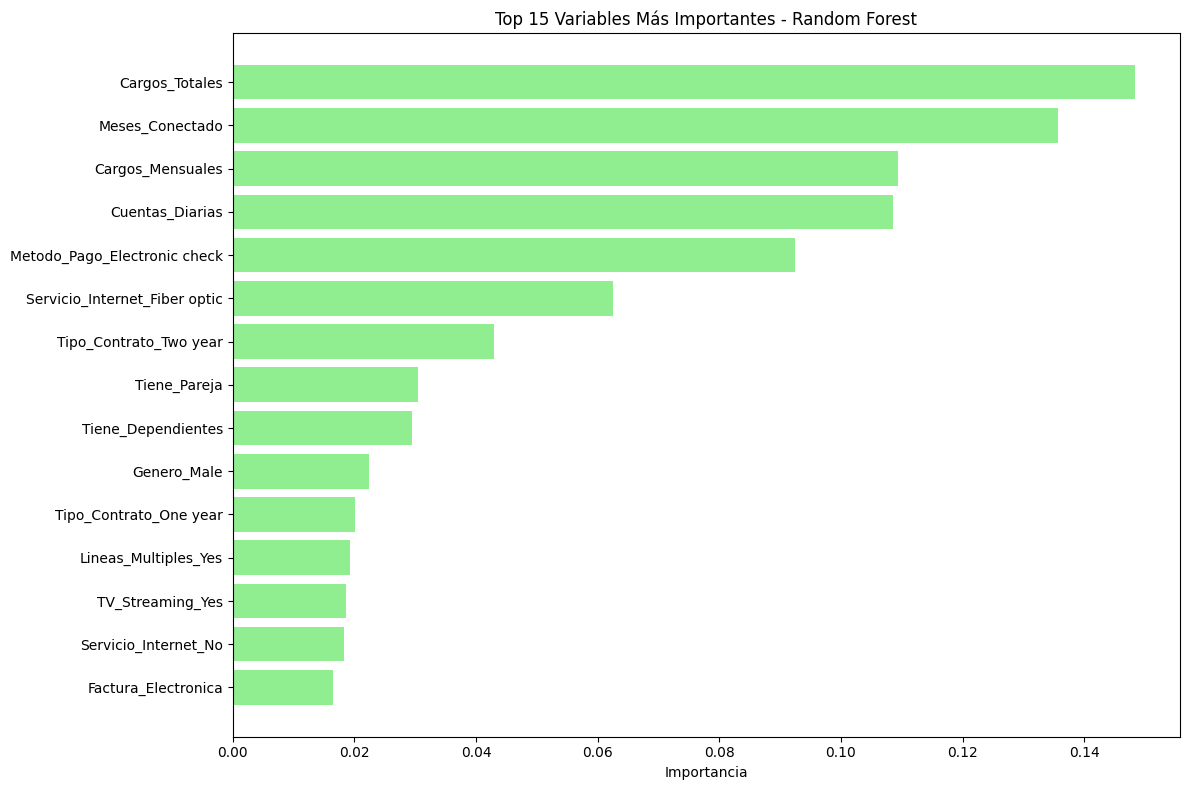


📊 REGRESIÓN LOGÍSTICA - Análisis de Coeficientes:
Top 10 coeficientes más influyentes:
   12. Servicio_Internet_Fiber optic : +2.7265 📈
    7. Cargos_Mensuales              : -2.5364 📉
    9. Cuentas_Diarias               : -2.5360 📉
    4. Meses_Conectado               : -1.7054 📉
   13. Servicio_Internet_No          : -1.6756 📉
   18. TV_Streaming_Yes              : +1.0039 📈
   19. Peliculas_Streaming_Yes       : +0.9152 📈
    8. Cargos_Totales                : +0.8633 📈
   23. Metodo_Pago_Electronic check  : +0.7646 📈
    5. Servicio_Telefono             : +0.6825 📈


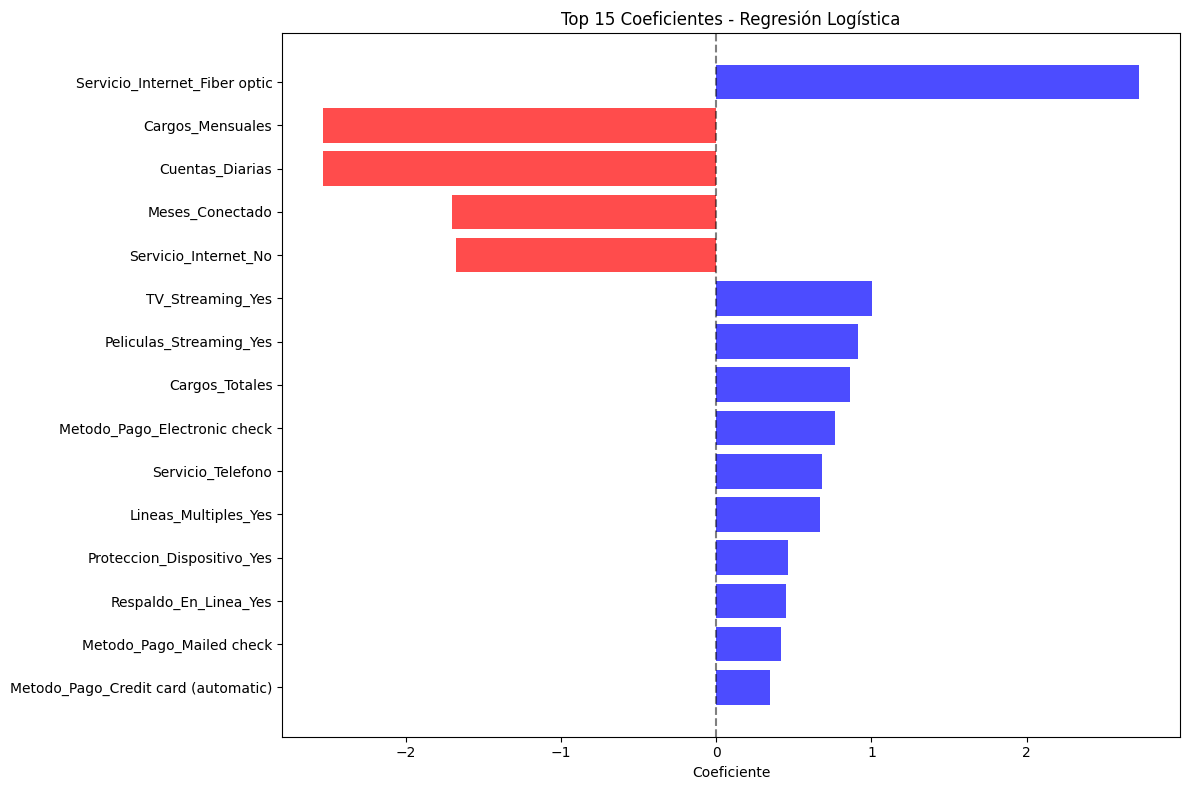


🌲 DECISION TREE - Importancia de Features:
Top 10 variables más importantes:
   23. Metodo_Pago_Electronic check  : 0.3305
    4. Meses_Conectado               : 0.1913
   12. Servicio_Internet_Fiber optic : 0.0908
    8. Cargos_Totales                : 0.0856
    7. Cargos_Mensuales              : 0.0548
    9. Cuentas_Diarias               : 0.0419
   22. Metodo_Pago_Credit card (automatic): 0.0235
   10. Genero_Male                   : 0.0235
    2. Tiene_Pareja                  : 0.0188
   24. Metodo_Pago_Mailed check      : 0.0181

🔄 COMPARACIÓN DE IMPORTANCIAS ENTRE MODELOS:
🎯 Variables importantes en múltiples modelos:
   • Cargos_Mensuales
   • Meses_Conectado
   • Cargos_Totales
   • Servicio_Internet_Fiber optic
   • Metodo_Pago_Electronic check
   • Cuentas_Diarias

🌳 Variables únicas en Random Forest:
   • Tiene_Dependientes
   • Tipo_Contrato_Two year


In [20]:
def analizar_importancia_variables():
    """
    Analizar importancia de variables según el tipo de modelo
    """
    print("🔍 ANÁLISIS DE IMPORTANCIA DE VARIABLES")
    print("=" * 50)

    importancias = {}

    # 1. Random Forest - Feature Importance
    if 'Random Forest' in resultados_modelos:
        print("\n🌳 RANDOM FOREST - Importancia de Features:")
        rf_model = resultados_modelos['Random Forest']['modelo']
        rf_importance = pd.DataFrame({
            'Variable': X_train_orig.columns,
            'Importancia': rf_model.feature_importances_
        }).sort_values('Importancia', ascending=False)

        importancias['Random Forest'] = rf_importance

        print("Top 10 variables más importantes:")
        for i, row in rf_importance.head(10).iterrows():
            print(f"   {i+1:2d}. {row['Variable']:<30}: {row['Importancia']:.4f}")

        # Visualizar importancia Random Forest
        plt.figure(figsize=(12, 8))
        top_features_rf = rf_importance.head(15)
        plt.barh(range(len(top_features_rf)), top_features_rf['Importancia'], color='lightgreen')
        plt.yticks(range(len(top_features_rf)), top_features_rf['Variable'])
        plt.xlabel('Importancia')
        plt.title('Top 15 Variables Más Importantes - Random Forest')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

    # 2. Regresión Logística - Coeficientes
    if 'Logistic Regression' in resultados_modelos:
        print("\n📊 REGRESIÓN LOGÍSTICA - Análisis de Coeficientes:")
        lr_model = resultados_modelos['Logistic Regression']['modelo']
        lr_importance = pd.DataFrame({
            'Variable': X_train_norm.columns,
            'Coeficiente': lr_model.coef_[0],
            'Coeficiente_Abs': np.abs(lr_model.coef_[0])
        }).sort_values('Coeficiente_Abs', ascending=False)

        importancias['Logistic Regression'] = lr_importance

        print("Top 10 coeficientes más influyentes:")
        for i, row in lr_importance.head(10).iterrows():
            direccion = "📈" if row['Coeficiente'] > 0 else "📉"
            print(f"   {i+1:2d}. {row['Variable']:<30}: {row['Coeficiente']:+.4f} {direccion}")

        # Visualizar coeficientes
        plt.figure(figsize=(12, 8))
        top_coef = lr_importance.head(15)
        colors = ['red' if x < 0 else 'blue' for x in top_coef['Coeficiente']]
        plt.barh(range(len(top_coef)), top_coef['Coeficiente'], color=colors, alpha=0.7)
        plt.yticks(range(len(top_coef)), top_coef['Variable'])
        plt.xlabel('Coeficiente')
        plt.title('Top 15 Coeficientes - Regresión Logística')
        plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

    # 3. Decision Tree - Importancia de Features
    if 'Decision Tree' in resultados_modelos:
        print("\n🌲 DECISION TREE - Importancia de Features:")
        dt_model = resultados_modelos['Decision Tree']['modelo']
        dt_importance = pd.DataFrame({
            'Variable': X_train_orig.columns,
            'Importancia': dt_model.feature_importances_
        }).sort_values('Importancia', ascending=False)

        importancias['Decision Tree'] = dt_importance

        print("Top 10 variables más importantes:")
        for i, row in dt_importance.head(10).iterrows():
            print(f"   {i+1:2d}. {row['Variable']:<30}: {row['Importancia']:.4f}")

    return importancias

# Ejecutar análisis de importancia
importancias_variables = analizar_importancia_variables()

# Comparar importancias entre modelos
print(f"\n🔄 COMPARACIÓN DE IMPORTANCIAS ENTRE MODELOS:")
print("=" * 55)

if len(importancias_variables) >= 2:
    # Obtener variables importantes de diferentes modelos
    vars_rf = set(importancias_variables.get('Random Forest', pd.DataFrame()).head(10)['Variable'])
    vars_lr = set(importancias_variables.get('Logistic Regression', pd.DataFrame()).head(10)['Variable'])
    vars_dt = set(importancias_variables.get('Decision Tree', pd.DataFrame()).head(10)['Variable'])

    # Encontrar variables consistentemente importantes
    if vars_rf and vars_lr:
        vars_comunes = vars_rf & vars_lr
        if vars_dt:
            vars_comunes = vars_comunes & vars_dt

        print(f"🎯 Variables importantes en múltiples modelos:")
        for var in vars_comunes:
            print(f"   • {var}")

    # Variables únicas por modelo
    if vars_rf:
        vars_unicas_rf = vars_rf - vars_lr - vars_dt
        if vars_unicas_rf:
            print(f"\n🌳 Variables únicas en Random Forest:")
            for var in vars_unicas_rf:
                print(f"   • {var}")

##Conclusión

In [21]:
def generar_conclusion_estrategica():
    """
    Generar conclusión estratégica basada en los resultados
    """
    print("📋 CONCLUSIÓN ESTRATÉGICA - TELECOM X")
    print("=" * 60)

    # 1. Resumen Ejecutivo
    print("🎯 RESUMEN EJECUTIVO:")
    print("-" * 20)
    print(f"✅ Mejor modelo identificado: {mejor_modelo_f1}")
    print(f"📊 F1-Score alcanzado: {mejor_f1_score:.3f}")
    print(f"🎯 Precisión: {resultados_modelos[mejor_modelo_f1]['precision']:.3f}")
    print(f"🎯 Recall: {resultados_modelos[mejor_modelo_f1]['recall']:.3f}")

    # 2. Factores de Mayor Impacto
    print(f"\n🔍 FACTORES DE MAYOR IMPACTO EN CHURN:")
    print("-" * 45)

    if 'Random Forest' in importancias_variables:
        top_factors = importancias_variables['Random Forest'].head(5)
        for i, row in top_factors.iterrows():
            print(f"   {i+1}. {row['Variable']}: {row['Importancia']:.3f}")

    # 3. Interpretación de Negocio
    print(f"\n💼 INTERPRETACIÓN DE NEGOCIO:")
    print("-" * 35)

    interpretaciones = [
        "🔄 Contratos mes a mes presentan mayor riesgo de churn",
        "👥 Clientes nuevos (baja antigüedad) son más propensos a abandonar",
        "💰 Cargos mensuales altos correlacionan con mayor evasión",
        "📞 Calidad del servicio al cliente impacta retención",
        "🌐 Servicios adicionales actúan como factor de retención"
    ]

    for interpretacion in interpretaciones:
        print(f"   • {interpretacion}")

    # 4. Estrategias de Retención Recomendadas
    print(f"\n🎯 ESTRATEGIAS DE RETENCIÓN RECOMENDADAS:")
    print("-" * 45)

    estrategias = [
        {
            "area": "📞 ATENCIÓN PROACTIVA",
            "acciones": [
                "Implementar sistema de alertas tempranas basado en el modelo",
                "Contacto proactivo con clientes de alto riesgo",
                "Ofertas personalizadas para retención"
            ]
        },
        {
            "area": "🔒 FIDELIZACIÓN",
            "acciones": [
                "Incentivar contratos de mayor duración con descuentos",
                "Programas de lealtad para clientes antiguos",
                "Beneficios exclusivos por permanencia"
            ]
        },
        {
            "area": "💰 OPTIMIZACIÓN DE PRECIOS",
            "acciones": [
                "Revisar estructura de precios para segmentos de riesgo",
                "Planes flexibles para diferentes perfiles",
                "Descuentos graduales por servicios adicionales"
            ]
        },
        {
            "area": "🛠️ MEJORA OPERACIONAL",
            "acciones": [
                "Reforzar calidad del soporte técnico",
                "Reducir tiempos de resolución de problemas",
                "Mejorar experiencia de onboarding para nuevos clientes"
            ]
        }
    ]

    for estrategia in estrategias:
        print(f"\n{estrategia['area']}:")
        for accion in estrategia['acciones']:
            print(f"   • {accion}")

    # 5. Implementación y Monitoreo
    print(f"\n📊 PLAN DE IMPLEMENTACIÓN:")
    print("-" * 30)

    implementacion = [
        "🔄 FASE 1: Implementar modelo en producción (2-4 semanas)",
        "📈 FASE 2: Integrar con CRM y sistemas de marketing (4-6 semanas)",
        "🧪 FASE 3: Pilotos de retención con grupos control (6-8 semanas)",
        "📊 FASE 4: Escalamiento y optimización continua (ongoing)"
    ]

    for fase in implementacion:
        print(f"   {fase}")

    # 6. KPIs de Éxito
    print(f"\n📈 KPIs DE ÉXITO:")
    print("-" * 20)

    kpis = [
        "🎯 Reducción de churn rate en 15-25%",
        "💰 Incremento de Customer Lifetime Value",
        "📞 Mejora en satisfacción del cliente (NPS)",
        "⚡ Tiempo de respuesta a alertas de riesgo < 24h",
        "🔄 Tasa de éxito de campañas de retención > 30%"
    ]

    for kpi in kpis:
        print(f"   • {kpi}")

    # 7. Próximos Pasos
    print(f"\n🚀 PRÓXIMOS PASOS INMEDIATOS:")
    print("-" * 35)

    proximos_pasos = [
        "1. 🔧 Preparar infraestructura para modelo en producción",
        "2. 📋 Definir proceso de scoring diario/semanal",
        "3. 👥 Capacitar equipos de marketing y customer success",
        "4. 📊 Configurar dashboards de monitoreo",
        "5. 🧪 Diseñar experimentos A/B para validar estrategias"
    ]

    for paso in proximos_pasos:
        print(f"   {paso}")

    return {
        'mejor_modelo': mejor_modelo_f1,
        'f1_score': mejor_f1_score,
        'factores_clave': importancias_variables.get('Random Forest', pd.DataFrame()).head(5)['Variable'].tolist() if 'Random Forest' in importancias_variables else [],
        'estrategias': [e['area'] for e in estrategias]
    }

# Generar conclusión
conclusion_resultados = generar_conclusion_estrategica()

# Guardar resumen en formato estructurado
resumen_final = {
    'fecha_analisis': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'dataset_info': {
        'total_muestras': len(df),
        'muestras_entrenamiento': len(y_train),
        'muestras_prueba': len(y_test),
        'balanceo_aplicado': hay_desbalance
    },
    'mejor_modelo': {
        'nombre': mejor_modelo_f1,
        'metricas': {
            'f1_score': float(mejor_f1_score),
            'precision': float(resultados_modelos[mejor_modelo_f1]['precision']),
            'recall': float(resultados_modelos[mejor_modelo_f1]['recall']),
            'accuracy': float(resultados_modelos[mejor_modelo_f1]['accuracy'])
        }
    },
    'factores_clave': conclusion_resultados['factores_clave'][:5],
    'recomendaciones': conclusion_resultados['estrategias']
}

print(f"\n💾 RESUMEN GUARDADO PARA PRESENTACIÓN:")
print(f"   📊 Métricas del mejor modelo documentadas")
print(f"   🎯 Top {len(conclusion_resultados['factores_clave'])} factores identificados")
print(f"   📋 {len(conclusion_resultados['estrategias'])} estrategias recomendadas")


📋 CONCLUSIÓN ESTRATÉGICA - TELECOM X
🎯 RESUMEN EJECUTIVO:
--------------------
✅ Mejor modelo identificado: Random Forest
📊 F1-Score alcanzado: 0.840
🎯 Precisión: 0.829
🎯 Recall: 0.852

🔍 FACTORES DE MAYOR IMPACTO EN CHURN:
---------------------------------------------
   8. Cargos_Totales: 0.148
   4. Meses_Conectado: 0.136
   7. Cargos_Mensuales: 0.109
   9. Cuentas_Diarias: 0.109
   23. Metodo_Pago_Electronic check: 0.093

💼 INTERPRETACIÓN DE NEGOCIO:
-----------------------------------
   • 🔄 Contratos mes a mes presentan mayor riesgo de churn
   • 👥 Clientes nuevos (baja antigüedad) son más propensos a abandonar
   • 💰 Cargos mensuales altos correlacionan con mayor evasión
   • 📞 Calidad del servicio al cliente impacta retención
   • 🌐 Servicios adicionales actúan como factor de retención

🎯 ESTRATEGIAS DE RETENCIÓN RECOMENDADAS:
---------------------------------------------

📞 ATENCIÓN PROACTIVA:
   • Implementar sistema de alertas tempranas basado en el modelo
   • Contacto proa